<a href="https://colab.research.google.com/github/mortarialex/cienciadedados2/blob/main/cd2_1004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Aula 10/04*
---
# **MÉTRICAS DE AVALIAÇÃO**
  
Uma matriz de confusão ou tabela de contingência pode ser utilizada para visualizar o desempenho de um classificador.

Precisão pode ser vista como uma medida de exatidão, enquanto a revocação uma medida de completude a precisão. Essas medidas são combinadas em uma nova medida: a medida-F, dada por essa fórmula:

Em caso de mais de duas classes, os cálculos são feitos classe a classe.

---


**Objetivos desta aula prática:**

1. Dividir dados em treino e teste com estratificação.
2. Avaliar modelos de classificação usando:
 - Matriz de Confusão
 - Acurácia, Precisão, Revocação (Recall), F1-Score
 - Curva ROC e AUC

3. Avaliar modelos de regressão usando:
 * MSE, RMSE, MAE e R²

---

Abaixo o exemplo praticado em aula

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('dados_aprovacao_alunos.csv')
X = data[['nota', 'faltas']] # variáveis preditoras
y = data['aprovado'] # variável alvo

In [10]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# stratify separa os dados em subgrupos com características em comum

In [ ]:
# criação e indução do modelo

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(trainX, trainY)

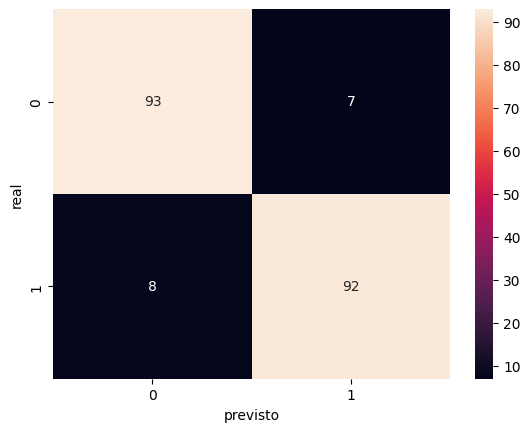

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predY = model.predict(testX)
confusionMatrix = confusion_matrix(testY, predY)

# gerar heatmap dos dados

sns.heatmap(confusionMatrix, annot = True, fmt = 'd')
plt.xlabel("previsto")
plt.ylabel("real")
plt.show()


 - **VP (Verdadeiros Positivos)**: Alunos que **realmente reprovaram** e foram **corretamente previstos como reprovados**.

- **VN (Verdadeiros Negativos)**: Alunos que **realmente passaram** e foram **corretamente previstos como aprovados** pelo modelo.

- **FP (Falsos Positivos)**: Alunos que o modelo "achou" que reprovariam mas passaram  

- **FN (Falsos Negativos)**: Alunos que o modelo "achou" que passariam mas reprovaram



[🟩 VP: 93] | [🟥 FP: 7]
------------|------------
[🟨 FN: 8]  | [🟦 VN: 92]



Legenda:

🟩 Verdadeiro Positivo

🟦 Verdadeiro Negativo

🟥 Falso Positivo (Erro I)

🟨 Falso Negativo (Erro II)

---

**Exercício:** Faça o cálculo manualmente das métricas a partir dos valores da matriz de confusão e preencha a tabela a seguir:

| Métrica         | Fórmula               | Cálculo               | Resultado | Interpretação                                                                 |
|-----------------|-----------------------|-----------------------|-----------|-------------------------------------------------------------------------------|
| **Acurácia**    | (VP + VN) / Total     | (93 + 92) / 200       | 92.5%     | 92.5% das previsões estão corretas                                             |
| **Precisão**    | VP / (VP + FP)        |   93 / (93 + 7)     |   93%   | Dos previstos como aprovados, X% realmente passaram                          |
| **Recall**      | VP / (VP + FN)        |   93 / (93 + 8)     |   92.07%   | Dos alunos que passaram, X% foram identificados                              |
| **F1-Score**    | 2 x (Prec x Rec) / (Prec + Rec)|   |    | Média harmônica entre Precisão e Recall                                      |
| **Especificidade** | VN / (VN + FP)     |   92 / (92 + 7)   |  92.92%   | Dos alunos que reprovaram, X% foram identificados corretamente               |
| **Taxa de Erro**| (FP + FN) / Total     |    (7 + 8)/ 100   |   0.15%   | X% das previsões estão incorretas                                           |


In [15]:
# esse método realiza os cálculos computacionalmente

from sklearn.metrics import classification_report

print(classification_report(testY, predY))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       100
           1       0.93      0.92      0.92       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

predProbY = model.predict_proba(testX)[:, 1] # probabilidade de aprovação

fpr, tpr, thresholds = roc_curve(testY, predY)
roc_auc = roc_auc_score(testY, predProbY)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC')

# me perdi nao escrevi o código do gráfico nem entendi nada tva vendo cinematic de lol oooooooooooooooooo espresso

---

In [27]:
regData = pd.read_csv('dados_previsao_nota.csv')

regX = regData['horas_estudo'].values.reshape(-1, 1)
regY = regData['nota_final']

# por ser um problema de regressão, não usa stratify

trainRegX, testRegX, trainRegY, testRegY = train_test_split(regX, regY, test_size=0.2, random_state=42)

In [28]:
# treinar o modelo

from sklearn.linear_model import LinearRegression

regModel = LinearRegression()
regModel.fit(trainRegX, trainRegY)

LinearRegression()

Após o treinamento, nesse caso, não há matriz de confusão pois não há categorias. É mais fácil de chegar nas métricas chegando através dos cálculos do numpy.

In [39]:
# regras mais comuns quando se trabalha com regressão

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predRegY = regModel.predict(testRegX)

mse = mean_squared_error(testRegY, predRegY)
mae = mean_absolute_error(testRegY, predRegY)
r2 = r2_score(testRegY, predRegY)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {mse**0.5:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}") # quanto mais próximo de 1, melhor

MSE: 6.27
RMSE: 2.50
MAE: 1.95
R²: 0.38


## 🔍 **Escolha Baseada no Seu Objetivo**

| Métrica | Melhor Para...                    | Exemplo Prático                     | Cuidado!                          |
|---------|-----------------------------------|-------------------------------------|-----------------------------------|
| **RMSE** | Quando **erros grandes são graves** (e devem ser penalizados mais) | Prever doses de medicamentos (erros altos são perigosos) | Sensível a outliers               |
| **MAE**  | Quando **todos os erros têm igual importância** | Prever preços de produtos cotidianos | Não destaca erros graves          |
| **R²**   | Saber **% da variância explicada** pelo modelo | Comparar dois modelos de previsão de notas | Pode ser alto mesmo com erros grandes |
| **MSE**  | Otimização de modelos (foco nos **erros quadráticos**) | Uso interno em algoritmos de ML | Difícil interpretação direta      |

## 📌 **Regra Prática: Qual Métrica Escolher?**

1. **"Preciso entender o erro em unidades reais?"** → RMSE ou MAE  
   - RMSE se erros grandes forem críticos  
   - MAE se todos os erros forem igualmente importantes  

2. **"Quero comparar modelos diferentes?"** → R² (quanto maior, melhor)  

3. **"Meu modelo será usado para tomar decisões de alto risco?"** → RMSE (prioriza evitar erros graves)  

4. **"Meus dados têm muitos valores extremos?"** → MAE (é mais robusto)  

## 💡 **Exemplo com Notas de Alunos**
- Se você está prevendo **notas finais** para identificar alunos em risco:  
  - Use **RMSE** (errar em 5 pontos é pior que errar em 1)  
- Se está prevendo **aprovados/reprovados**:  
  - Use **R²** para ver se o modelo explica bem a variação nas notas  

## ⚠️ **Armadilhas Comuns**
- **Só usar R²**: Pode mascarar erros grandes se o modelo estiver enviesado  
- **Ignorar outliers**: RMSE vai inflacionar, MAE é mais justo  
- **Não contextualizar**: Um RMSE de 2 é bom? Depende! Se as notas vão de 0 a 10, é ótimo. Se vão de 0 a 100, é péssimo.  